In [ ]:
import urllib.request
import requests
import math 
from numpy import *
from numpy.linalg import norm

In [28]:
a = 0.4
b = 0.2
float(requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={a}&b={b}", headers={"User-Agent": "MyScript"}).text)

1.294915

In [20]:
def f(a,b,h=1e-5):
    result = float(requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={a}&b={b}", headers={"User-Agent": "MyScript"}).text)
    return result
#Since we do not know the function, we cannot calculate the true gradient of the function, we have to do estimation.
def gradient(a,b,h=1e-3):
    df_da = (f(a + h, b) - f(a, b)) / h
    df_db = (f(a, b + h) - f(a, b)) / h
    return df_da, df_db

def gradient_descent(start_a, start_b, learning_rate=0.01, tolerance=1e-5, max_iterations=1000):
    a, b = start_a, start_b
    for iteration in range(max_iterations):
        df_da, df_db = gradient(a, b,h=1e-3)
        
        # Update parameters
        new_a = a - learning_rate * df_da
        new_b = b - learning_rate * df_db
        
        # Check for convergence-This is our 'stopping strategy' (the iteration number is actually another stopping)
        if abs(new_a - a) < tolerance and abs(new_b - b) < tolerance:
            print(f"Converged in {iteration} iterations.")
            break
        
        a, b = new_a, new_b
        #print(f"Iteration {iteration}: a = {a}, b = {b}, f(a, b) = {f(a, b)}")
    
    return a, b,f(a, b)




In [42]:
initial_points = [(0.9, 0.1), (0.5, 0.5), (0.1, 0.9)]
results = []

for initial_a, initial_b in initial_points:
    a, b, min_f = gradient_descent(initial_a, initial_b)
    results.append((a, b, min_f))

# Determine which is local and which is global
results.sort(key=lambda x: x[2])  # Sort by function value to identify the minima
global_min = results[0] 
local_min = results[1]  

print(f"Global minimum found at a={global_min[0]}, b={global_min[1]}, with f(a, b)={global_min[2]}")
print(f"Local minimum found at a={local_min[0]}, b={local_min[1]}, with f(a, b)={local_min[2]}")

Converged in 114 iterations.
Converged in 315 iterations.
Converged in 300 iterations.
Global minimum found at a=0.7116628873000056, b=0.1684408077999854, with f(a, b)=1.00000127902
Local minimum found at a=0.2152305954000199, b=0.6889933245000216, with f(a, b)=1.10000059203


In [36]:
import numpy as np
def simulated_annealing(initial_a, initial_b, temp=100, cooling_rate=0.95, min_temp=1e-3, max_iterations=1000):
    a, b = initial_a, initial_b
    current_value = f(a, b)
    best_a, best_b = a, b
    best_value = current_value

    iteration = 0
    while temp > min_temp and iteration < max_iterations:
        # Generate new candidate solution by perturbing the current solution
        new_a = a + random.uniform(-0.1, 0.1)
        new_b = b + random.uniform(-0.1, 0.1)

        # Ensure the new values for a and b are within the range (0, 1)
        new_a = max(0.000001, min(0.99999, new_a))
        new_b = max(0.000001, min(0.99999, new_b))

        # Calculate the function value at the new candidate solution
        new_value = f(new_a, new_b)

        # Calculate the difference in function values (energy difference)
        delta_value = new_value - current_value

        # Acceptance criteria
        if delta_value < 0 or random.random() < np.exp(-delta_value / temp):
            # Accept the new solution
            a, b = new_a, new_b
            current_value = new_value

            # Update the best found solution if the new one is better
            if current_value < best_value:
                best_a, best_b = a, b
                best_value = current_value

        # Cool down the temperature
        temp *= cooling_rate
        iteration += 1

        # Optionally print progress
        print(f"Iteration {iteration}: a={a:.4f}, b={b:.4f}, f(a, b)={current_value:.4f}, temp={temp:.4f}")

    return best_a, best_b, best_value

# Initial starting point (ensure a and b are within the (0,1) range)
initial_a, initial_b = 0.5, 0.9

# Run Simulated Annealing
best_a, best_b, best_value = simulated_annealing(initial_a, initial_b)
print(f"Best found solution: a={best_a}, b={best_b}, f(a, b)={best_value}")

Iteration 1: a=0.4454, b=0.9865, f(a, b)=1.2411, temp=95.0000
Iteration 2: a=0.3652, b=0.9454, f(a, b)=1.1880, temp=90.2500
Iteration 3: a=0.4404, b=0.9821, f(a, b)=1.2362, temp=85.7375
Iteration 4: a=0.5390, b=0.9043, f(a, b)=1.2507, temp=81.4506
Iteration 5: a=0.4648, b=0.9626, f(a, b)=1.2367, temp=77.3781
Iteration 6: a=0.3879, b=0.8681, f(a, b)=1.1616, temp=73.5092
Iteration 7: a=0.3683, b=0.8369, f(a, b)=1.1451, temp=69.8337
Iteration 8: a=0.4625, b=0.7879, f(a, b)=1.1705, temp=66.3420
Iteration 9: a=0.4025, b=0.7794, f(a, b)=1.1430, temp=63.0249
Iteration 10: a=0.3281, b=0.7318, f(a, b)=1.1144, temp=59.8737
Iteration 11: a=0.2804, b=0.8312, f(a, b)=1.1244, temp=56.8800
Iteration 12: a=0.3092, b=0.7945, f(a, b)=1.1198, temp=54.0360
Iteration 13: a=0.2153, b=0.8223, f(a, b)=1.1178, temp=51.3342
Iteration 14: a=0.2358, b=0.8030, f(a, b)=1.1134, temp=48.7675
Iteration 15: a=0.2017, b=0.8823, f(a, b)=1.1376, temp=46.3291
Iteration 16: a=0.2859, b=0.9205, f(a, b)=1.1585, temp=44.0127
I

In [37]:
# Initial starting point
initial_a, initial_b = 0.3, 0.5

# Run Simulated Annealing
best_a, best_b, best_value = simulated_annealing(initial_a, initial_b)

print(f"Best found solution: a={best_a}, b={best_b}, f(a, b)={best_value}")

Iteration 1: a=0.2375, b=0.5497, f(a, b)=1.1199, temp=95.0000
Iteration 2: a=0.2214, b=0.5624, f(a, b)=1.1160, temp=90.2500
Iteration 3: a=0.2279, b=0.5193, f(a, b)=1.1289, temp=85.7375
Iteration 4: a=0.3229, b=0.5606, f(a, b)=1.1279, temp=81.4506
Iteration 5: a=0.2945, b=0.5406, f(a, b)=1.1282, temp=77.3781
Iteration 6: a=0.3650, b=0.5044, f(a, b)=1.1563, temp=73.5092
Iteration 7: a=0.2958, b=0.4171, f(a, b)=1.1803, temp=69.8337
Iteration 8: a=0.3521, b=0.4260, f(a, b)=1.1877, temp=66.3420
Iteration 9: a=0.3730, b=0.4449, f(a, b)=1.1842, temp=63.0249
Iteration 10: a=0.3296, b=0.3703, f(a, b)=1.2145, temp=59.8737
Iteration 11: a=0.3640, b=0.3701, f(a, b)=1.2236, temp=56.8800
Iteration 12: a=0.4533, b=0.2916, f(a, b)=1.2459, temp=54.0360
Iteration 13: a=0.3571, b=0.2522, f(a, b)=1.3107, temp=51.3342
Iteration 14: a=0.4391, b=0.3076, f(a, b)=1.2809, temp=48.7675
Iteration 15: a=0.3495, b=0.2454, f(a, b)=1.3146, temp=46.3291
Iteration 16: a=0.4091, b=0.2055, f(a, b)=1.2793, temp=44.0127
I

In [40]:
import random
import numpy as np

def simulated_annealing(initial_a, initial_b, temp=100, cooling_rate=0.95, min_temp=1e-3, max_iterations=1000, perturbation_scale=0.1):
    a, b = initial_a, initial_b
    current_value = f(a, b)
    best_a, best_b = a, b
    best_value = current_value

    iteration = 0
    while temp > min_temp and iteration < max_iterations:
        # new candidate solution
        new_a = a + random.uniform(-perturbation_scale, perturbation_scale)
        new_b = b + random.uniform(-perturbation_scale, perturbation_scale)

        # Ensure the new values for a and b are within the range (0, 1), I just use 0.00001 and 0.99999 as an estimation
        new_a = max(0.00001, min(0.99999, new_a))
        new_b = max(0.00001, min(0.99999, new_b))

        # Calculate the function value at the new candidate solution
        new_value = f(new_a, new_b)

        # Calculate the difference in function values (energy difference)
        delta_value = new_value - current_value

        # Acceptance criteria
        if delta_value < 0 or random.random() < np.exp(-delta_value / temp):
            # Accept the new solution
            a, b = new_a, new_b
            current_value = new_value

            # Update the best found solution if the new one is better
            if current_value < best_value:
                best_a, best_b = a, b
                best_value = current_value

        # 'Cool down' the temperature
        temp *= cooling_rate
        iteration += 1

        print(f"Iteration {iteration}: a={a:.4f}, b={b:.4f}, f(a, b)={current_value:.4f}, temp={temp:.4f}")

    return best_a, best_b, best_value


In [43]:
# Initial starting point
initial_a, initial_b = 0.9, 0.1

# Run Simulated Annealing
best_a, best_b, best_value = simulated_annealing(initial_a, initial_b)

print(f"Best found solution: a={best_a}, b={best_b}, f(a, b)={best_value}")

Iteration 1: a=0.9836, b=0.0087, f(a, b)=1.2984, temp=95.0000
Iteration 2: a=0.9059, b=0.0000, f(a, b)=1.1985, temp=90.2500
Iteration 3: a=0.9904, b=0.0594, f(a, b)=1.2686, temp=85.7375
Iteration 4: a=1.0000, b=0.0115, f(a, b)=1.3233, temp=81.4506
Iteration 5: a=0.9191, b=0.0806, f(a, b)=1.1521, temp=77.3781
Iteration 6: a=0.8505, b=0.1612, f(a, b)=1.0577, temp=73.5092
Iteration 7: a=0.8594, b=0.1623, f(a, b)=1.0653, temp=69.8337
Iteration 8: a=0.9182, b=0.2088, f(a, b)=1.1323, temp=66.3420
Iteration 9: a=0.9813, b=0.2858, f(a, b)=1.2584, temp=63.0249
Iteration 10: a=1.0000, b=0.3411, f(a, b)=1.3377, temp=59.8737
Iteration 11: a=1.0000, b=0.3873, f(a, b)=1.3917, temp=56.8800
Iteration 12: a=1.0000, b=0.4428, f(a, b)=1.4737, temp=54.0360
Iteration 13: a=0.9424, b=0.5050, f(a, b)=1.4979, temp=51.3342
Iteration 14: a=0.9483, b=0.5756, f(a, b)=1.6490, temp=48.7675
Iteration 15: a=0.9585, b=0.5431, f(a, b)=1.6021, temp=46.3291
Iteration 16: a=0.9853, b=0.6100, f(a, b)=1.6980, temp=44.0127
I

In [44]:
pip install pandas plotnine

Note: you may need to restart the kernel to use updated packages.


In [45]:
conda install -c conda-forge cartopy

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
 - pytorch
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hf0a4a13_0         155 KB  conda-forge
    cartopy-0.24.0             |  py312hcd31e36_0         1.4 MB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.9.2               |  py312h81bd7bf_0         1.1 MB  conda-forge
    geos-3.13.0                |       hf9b8971_0         1.4 MB  conda-forge
    libcxx-19.1.3              |       ha82da77_0         509 KB  conda-forge
    libexpat-2.6.2             |       hebf3989_0          62 KB  conda-forge
    libsqlite-3.46.0           |       hfb93653_0         811 KB  conda-for

In [46]:
conda install -c conda-forge basemap-data-hires

/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:198: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:198: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.

In [53]:
import numpy as np
import pandas as pd
from plotnine import *
import random
import cartopy.crs as ccrs

In [52]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.9/569.9 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
data = pd.read_csv("./simplemaps_worldcities_basicv1.77/worldcities.csv")
data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [57]:
df = data[['lat', 'lng']]
df

,lat,lng
0,35.6897,139.6922
1,-6.1750,106.8275
2,28.6100,77.2300
3,23.1300,113.2600
4,19.0761,72.8775
...,...,...
47863,39.3813,127.2517
47864,39.4880,125.4640
47865,34.9897,126.4714
47866,36.6009,126.6650


Converged in 36 iterations.


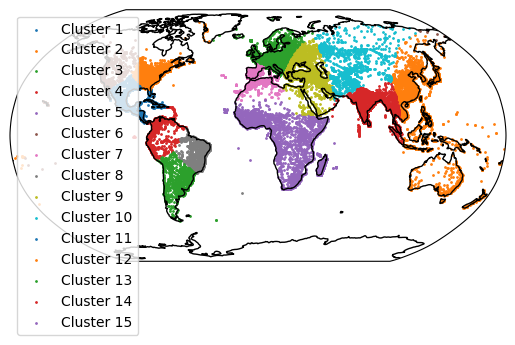

In [88]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
df = pd.read_csv('./simplemaps_worldcities_basicv1.77/worldcities.csv') 

def lat_lon_to_cartesian(lat, lon):
    """Convert latitude and longitude to Cartesian coordinates."""
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)
    return np.array([x, y, z])

def cosine_similarity(vec1, vec2):
    """Calculate cosine similarity between two vectors."""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Convert all points to Cartesian coordinates
pts = np.array([lat_lon_to_cartesian(lat, lon) for lat, lon in zip(df['lat'], df['lng'])])


k = 15  #5, 7, or 15
max_iters = 100  # number of max iteration
centers = random.sample(list(pts), k)
old_cluster_ids, cluster_ids = None, [-1] * len(pts)

# Lloyd's algorithm for k-means clustering with cosine similarity and max iterations
for iteration in range(max_iters):
    old_cluster_ids = cluster_ids.copy()
    cluster_ids = []
    for pt in pts:
        # Assign each point to the closest centroid based on cosine similarity
        similarities = [cosine_similarity(pt, center) for center in centers]
        max_cluster = np.argmax(similarities)
        cluster_ids.append(max_cluster)
 
    for i in range(k):
        cluster_pts = [pt for j, pt in enumerate(pts) if cluster_ids[j] == i]
        if cluster_pts:
            new_center = np.mean(cluster_pts, axis=0)
            centers[i] = new_center / np.linalg.norm(new_center)  # Normalize to unit vector

    # Break the loop if clusters do not change iteratively
    if cluster_ids == old_cluster_ids:
        print(f"Converged in {iteration + 1} iterations.")
        break
else:
    print(f"Reached maximum iterations: {max_iters}")

df['cluster'] = cluster_ids

# Plotting the clusters on a map
def plot_clusters(df, k):
    fig, ax = plt.subplots(subplot_kw={"projection": ccrs.Robinson()})
    ax.set_global()
    ax.coastlines()
    for i in range(k):
        cluster_df = df[df['cluster'] == i]
        ax.scatter(
            cluster_df['lng'], cluster_df['lat'],
            s=1, transform=ccrs.PlateCarree(),
            label=f"Cluster {i+1}"
        )

    ax.legend()
    plt.show()

plot_clusters(df, k)


In [89]:
import numpy as np
import matplotlib.pyplot as plt

def euler_sir(S0, I0, R0, beta, gamma, Tmax, dt=0.1):
    # Initialize parameters
    N = S0 + I0 + R0
    S, I, R = S0, I0, R0
    t = 0
    times = [t]
    S_values, I_values, R_values = [S], [I], [R]
    
    while t < Tmax:
        # Euler method update
        dS = -beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I

        S += dS * dt
        I += dI * dt
        R += dR * dt

        # Update time
        t += dt
        times.append(t)
        S_values.append(S)
        I_values.append(I)
        R_values.append(R)
        
    return np.array(times), np.array(S_values), np.array(I_values), np.array(R_values)

Disease runs its course by time: 29.900000000000155


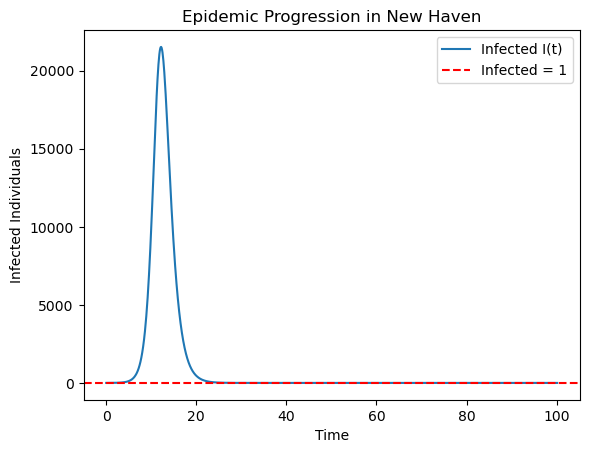

In [90]:
# New Haven specific parameters
N = 137000
S0 = N - 1  # Initially susceptible
I0 = 1      # Initially infected
R0 = 0      # Initially recovered
beta = 2    # Infection rate
gamma = 1   # Recovery rate
Tmax = 100  # Sufficiently large time to let the epidemic run its course

# Run the simulation
times, S_values, I_values, R_values = euler_sir(S0, I0, R0, beta, gamma, Tmax)

# Find the time point where I < 1
for i, I in enumerate(I_values):
    if I < 1:
        print(f"Disease runs its course by time: {times[i]}")
        break

# Plotting I(t)
plt.plot(times, I_values, label="Infected I(t)")
plt.axhline(1, color='r', linestyle='--', label='Infected = 1')
plt.xlabel("Time")
plt.ylabel("Infected Individuals")
plt.title("Epidemic Progression in New Haven")
plt.legend()
plt.show()


In [92]:
# Finding peak infection time and maximum number of infections
max_infected = max(I_values)
peak_time = times[np.argmax(I_values)]
print(f"Peak time: {peak_time}")
print(f"Maximum number of infected individuals: {max_infected}")


Peak time: 12.199999999999973
Maximum number of infected individuals: 21525.699125405023


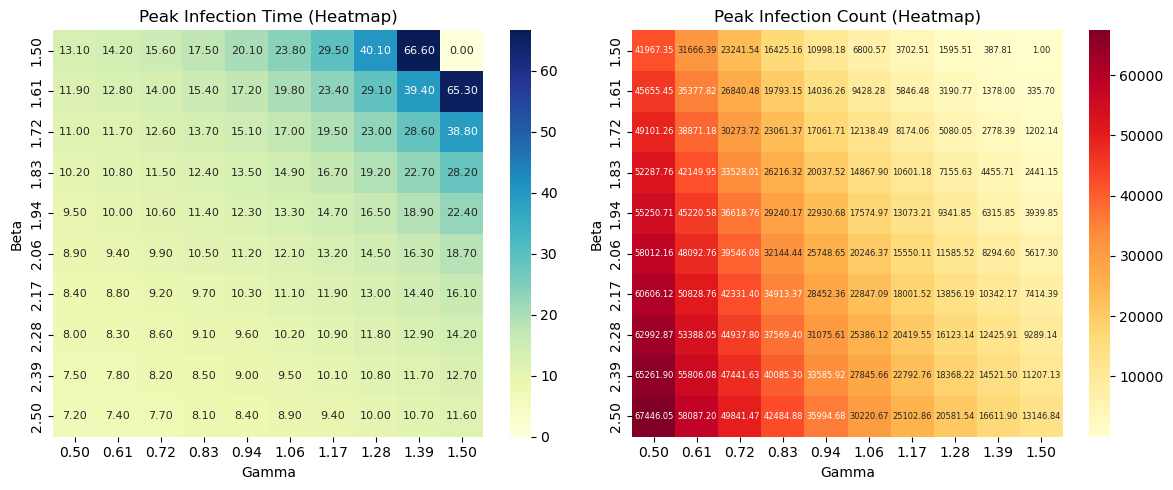

In [95]:
import pandas as pd
import seaborn as sns

# Define ranges for beta and gamma
beta_values = np.linspace(1.5, 2.5, 10)
gamma_values = np.linspace(0.5, 1.5, 10)

peak_infection_times = []
peak_infection_counts = []

# Calculate peak infection time and count for each combination of beta and gamma
for beta in beta_values:
    row_times = []
    row_counts = []
    for gamma in gamma_values:
        times, S_values, I_values, R_values = euler_sir(S0, I0, R0, beta, gamma, Tmax)
        max_infected = max(I_values)
        peak_time = times[np.argmax(I_values)]
        row_times.append(peak_time)
        row_counts.append(max_infected)
    peak_infection_times.append(row_times)
    peak_infection_counts.append(row_counts)

# Convert results to DataFrames for plotting
df_times = pd.DataFrame(peak_infection_times, index=beta_values, columns=gamma_values)
df_counts = pd.DataFrame(peak_infection_counts, index=beta_values, columns=gamma_values)


### I asked CHATGPT to help me visualize the heatmap. 
# #key assistance from CHATGPT: I want to change the font in each grid and keep the numbers in two-decimal.
plt.figure(figsize=(12, 5))

# Peak infection time heatmap
plt.subplot(1, 2, 1)
sns.heatmap(
    df_times, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=[f"{x:.2f}" for x in gamma_values], 
    yticklabels=[f"{y:.2f}" for y in beta_values],
    annot_kws={"size": 8}  # Set font size for annotations
)
plt.title("Peak Infection Time (Heatmap)")
plt.xlabel("Gamma")
plt.ylabel("Beta")

# Peak infection count heatmap
plt.subplot(1, 2, 2)
sns.heatmap(
    df_counts, 
    annot=True, 
    fmt=".2f", 
    cmap="YlOrRd", 
    xticklabels=[f"{x:.2f}" for x in gamma_values], 
    yticklabels=[f"{y:.2f}" for y in beta_values],
    annot_kws={"size": 6}  # Set font size for annotations
)
plt.title("Peak Infection Count (Heatmap)")
plt.xlabel("Gamma")
plt.ylabel("Beta")

plt.tight_layout()
plt.show()

